In [1]:
import networkx as nx
import pickle
import itertools

dataset_type = 'synthetic'
motif_type = 'bifan_weighted'
results_file_name = '../../dataset/'+dataset_type+'/'+motif_type+'/results.pkl'
with open(results_file_name, 'rb') as f:
    final_res = pickle.load(f)

saved_path = '../../dataset/synthetic/'+motif_type+'/list_records.pkl'
with open(saved_path, "rb") as fp:   #Pickling
    list_records = pickle.load(fp)

P = nx.DiGraph()
P.add_nodes_from([0, 1, 2, 3])
P.add_edges_from([(0, 2), (0, 3), (1, 2), (1,3)])
P[0][2]['weight'] = 0
P[0][3]['weight'] = 1
P[1][2]['weight'] = 1
P[1][3]['weight'] = 0

# Extract baseline results

In [2]:
baseline_file_name = '../../dataset/'+dataset_type+'/'+motif_type+'/raw_baseline_results.txt'
print(baseline_file_name)
baseline_results = []
saved_motifs = []
with open(baseline_file_name, 'r') as f:
    while True:
        x = f.readline()
        #print(x)
        if x == '':
            break
        if x[0] == '-':
            continue
        if '0' <= x[0] and x[0] <= '9':
            arr = x.split('\t')
            test_case = int(arr[0][:-4])
            nums_pure_motifs = int(arr[1])
            running_time = int(arr[2][:-3])
            baseline_results.append({'test_case': test_case, 'nums_pure_motifs': nums_pure_motifs, 'running_time': running_time, 'saved_pure_motifs':saved_motifs})
            saved_motifs = []
            continue
        
        arr = x.split(' ')
        #baseline_results.append(int(arr[1]))
        flag = 0
        last_num = -1
        motifs = []
        for element in arr:
            num = ''
            for e in element:
                if '0' <= e and e <= '9':
                    num = num + e
            if num == '':
                break
            if flag == 1:
                motifs.append((int(last_num), int(num)))
                #print(last_num, num)
            last_num = int(num)
            flag = 1 - flag
        #print(motifs)
        saved_motifs.append(motifs)
        #break

../../dataset/synthetic/bifan_weighted/raw_baseline_results.txt


In [3]:
import copy
refined_baseline_results = []
for t in range(1, 376, 1):
    index = int((t-1)/3) + 1
    edge_lst = []
    #file_name = 'graph_generator/graph_'+str(nums_node)+'Nodes_'+str(degree)+'AvgDegree_'+str(graph_type)+'GraphType_'+str(i)+'_TestCase.txt'
    #file_name = 'dataset/'+dataset_type+'/'+motif_type+'/'+size+'/'+str(t)+'.txt'
    file_name = '../../dataset/'+dataset_type+'/'+motif_type+'/'+str(t)+'.txt'
    weightG = {}
    with open(file_name) as f:
        while (True):
            s = f.readline()
            if s == '':
                break

            lst = list(s[:-1].split(" "))
            #print(lst)
            edge_lst.append((int(lst[0]), int(lst[1])))
            #print(lst)
            weightG[(int(lst[0]), int(lst[1]))] = int(lst[2])
    #G_init = nx.DiGraph()
    #G_init.add_edges_from(edge_lst)
    new_record = {}
    for record in baseline_results:
        if record['test_case'] == index:
            new_record = copy.copy(record)
            break
    
    new_record['test_case'] = t
    refined_saved_motifs = []
    refined_nums_motifs = 0
    #print(new_record, index)
    #print(edge_lst)
    try:
        for motif in new_record['saved_pure_motifs']:
            node_set = list(set(motif[0] + motif[1] + motif[2] + motif[3]))
            #print(node_set)
            for permu in list(itertools.permutations([0,1,2,3])):
                #print(permu)
                mapping = {permu[0]: node_set[0], permu[1]: node_set[1], permu[2]: node_set[2], permu[3]: node_set[3]}
                #print(mapping,i,j,k)
                #mapping = {0: node_set[i], 1: node_set[j], 2: node_set[k]}
                check = True
                for ed in P.edges():
                    if not (mapping[ed[0]], mapping[ed[1]]) in edge_lst:
                        check = False
                        break
                if not check:
                    continue
                #print("INDEX: ",index, mapping)
                check_weight = True
                for ed in P.edges():
                    #print(weightG[(mapping[ed[0]], mapping[ed[1]])], P[ed[0]][ed[1]]['weight'])
                    if weightG[(mapping[ed[0]], mapping[ed[1]])] != P[ed[0]][ed[1]]['weight']:
                        check_weight = False
                        break
                if check_weight:
                    refined_saved_motifs.append(motif)
                    refined_nums_motifs += 1
                    break
    except:
        print(index, t, (ed[0], ed[1]))
    new_record['saved_refined_motifs'] = refined_saved_motifs
    new_record['nums_refined_motifs'] = refined_nums_motifs
    refined_baseline_results.append(new_record)

# Plot figures

In [4]:
plot_qc = {'nums_nodes': {}, 'degree': {}, 'activation_ratio': {}}
rtime_qc = {'nums_nodes': {}, 'degree': {}, 'activation_ratio': {}}
plot_baseline = {'nums_nodes': {}, 'degree': {}, 'activation_ratio': {}}
rtime_baseline = {'nums_nodes': {}, 'degree': {}, 'activation_ratio': {}}

for record in list_records:
    test_index = record['test_index']
    nums_nodes = record['nums_nodes']
    degree = record['degree']
    activation_ratio = record['activation_ratio']
    nums_motifs = final_res[test_index - 1]['nums_motifs']
    running_time = final_res[test_index - 1]['running_time']
    #print(nums_nodes, degree, activation_ratio, running_time)
    
    if nums_nodes not in plot_qc['nums_nodes'].keys():
        plot_qc['nums_nodes'][nums_nodes] = [nums_motifs]
        rtime_qc['nums_nodes'][nums_nodes] = [running_time]
    else:
        plot_qc['nums_nodes'][nums_nodes].append(nums_motifs)
        rtime_qc['nums_nodes'][nums_nodes].append(running_time)
        
    if degree not in plot_qc['degree'].keys():
        plot_qc['degree'][degree] = [nums_motifs]
        rtime_qc['degree'][degree] = [running_time]
    else:
        plot_qc['degree'][degree].append(nums_motifs)
        rtime_qc['degree'][degree].append(running_time)
        
    if activation_ratio not in plot_qc['activation_ratio'].keys():
        plot_qc['activation_ratio'][activation_ratio] = [nums_motifs]
        rtime_qc['activation_ratio'][activation_ratio] = [running_time]
    else:
        plot_qc['activation_ratio'][activation_ratio].append(nums_motifs)
        rtime_qc['activation_ratio'][activation_ratio].append(running_time)

for record in list_records:
    test_index = record['test_index']
    nums_nodes = record['nums_nodes']
    degree = record['degree']
    activation_ratio = record['activation_ratio']
    nums_motifs = refined_baseline_results[test_index - 1]['nums_refined_motifs']
    running_time = refined_baseline_results[test_index - 1]['running_time']
    
    if nums_nodes not in plot_baseline['nums_nodes'].keys():
        plot_baseline['nums_nodes'][nums_nodes] = [nums_motifs]
        rtime_baseline['nums_nodes'][nums_nodes] = [running_time]
    else:
        plot_baseline['nums_nodes'][nums_nodes].append(nums_motifs)
        rtime_baseline['nums_nodes'][nums_nodes].append(running_time)
        
    if degree not in plot_baseline['degree'].keys():
        plot_baseline['degree'][degree] = [nums_motifs]
        rtime_baseline['degree'][degree] = [running_time]
    else:
        plot_baseline['degree'][degree].append(nums_motifs)
        rtime_baseline['degree'][degree].append(running_time)
        
    if activation_ratio not in plot_baseline['activation_ratio'].keys():
        plot_baseline['activation_ratio'][activation_ratio] = [nums_motifs]
        rtime_baseline['activation_ratio'][activation_ratio] = [running_time]
    else:
        plot_baseline['activation_ratio'][activation_ratio].append(nums_motifs)
        rtime_baseline['activation_ratio'][activation_ratio].append(running_time)

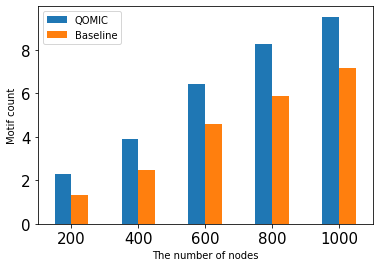

In [5]:
# importing pandas library 
import pandas as pd 
# import matplotlib library 
import matplotlib.pyplot as plt
from statistics import mean 
  
# creating dataframe

list_nums_nodes = [200, 400, 600, 800, 1000]
list_qc = []
list_baseline = []
for nums in list_nums_nodes:
    list_qc.append(mean(plot_qc['nums_nodes'][nums]))
    list_baseline.append(mean(plot_baseline['nums_nodes'][nums]))

df_nums_nodes = pd.DataFrame({ 
    'nums_nodes': list_nums_nodes, 
    'QOMIC': list_qc, 
    'Baseline': list_baseline
})
plt.rc('font', size=15)
plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)
# plotting graph 
df_nums_nodes.plot(x="nums_nodes", y=["QOMIC", "Baseline"], kind="bar", rot=0, xlabel = 'The number of nodes', 
                   ylabel = 'Motif count')
plt.savefig("../../figure/bifan_nums_nodes.pdf", format="pdf", bbox_inches="tight")


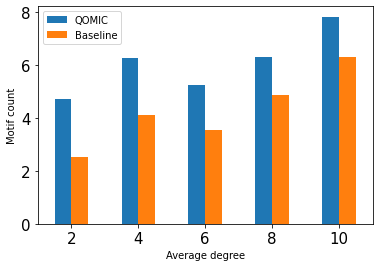

In [6]:
# importing pandas library 
import pandas as pd 
# import matplotlib library 
import matplotlib.pyplot as plt
from statistics import mean 
  
# creating dataframe

list_degree = [2, 4, 6, 8, 10]
list_qc = []
list_baseline = []
for nums in list_degree:
    list_qc.append(mean(plot_qc['degree'][nums]))
    list_baseline.append(mean(plot_baseline['degree'][nums]))

df_degree = pd.DataFrame({ 
    'degree': list_degree, 
    'QOMIC': list_qc, 
    'Baseline': list_baseline
})
# plotting graph 
df_degree.plot(x="degree", y=["QOMIC", "Baseline"], kind="bar", rot=0, xlabel = 'Average degree', 
                   ylabel = 'Motif count') 
plt.savefig("../../figure/bifan_degree.pdf", format="pdf", bbox_inches="tight")


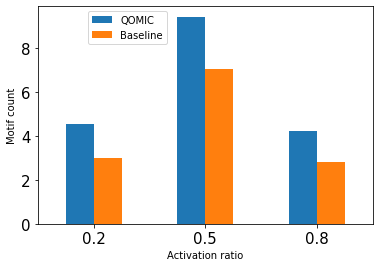

In [7]:
# importing pandas library 
import pandas as pd 
# import matplotlib library 
import matplotlib.pyplot as plt
from statistics import mean 
  
# creating dataframe

list_activation_ratio = [0.2, 0.5, 0.8]
list_qc = []
list_baseline = []
for nums in list_activation_ratio:
    list_qc.append(mean(plot_qc['activation_ratio'][nums]))
    list_baseline.append(mean(plot_baseline['activation_ratio'][nums]))

df_degree = pd.DataFrame({ 
    'activation_ratio': list_activation_ratio, 
    'QOMIC': list_qc, 
    'Baseline': list_baseline
})
# plotting graph 
df_degree.plot(x="activation_ratio", y=["QOMIC", "Baseline"], kind="bar", rot=0, xlabel = 'Activation ratio', 
                   ylabel = 'Motif count').legend(bbox_to_anchor=(0.4, 1))
plt.savefig("../../figure/bifan_ratio.pdf", format="pdf", bbox_inches="tight")
